# LSTM- Long Short Term Memory

## What is LSTM?

Long Short-Term Memory Network or LSTM, is a variation of a recurrent neural network (RNN) that is quite effective in predicting the long sequences of data like sentences and stock prices over a period of time.

It differs from a normal feedforward network because there is a feedback loop in its architecture. It also includes a special unit known as a memory cell to withhold the past information for a longer time for making an effective prediction.

## Why was LSTM introduced?
For recurrent neural networks, we  want to have long memories, so the network can connect data relationships at significant distances in time(during time-series analysis). That sort of network could make real progress in understanding how language and narrative works, how stock market events are correlated and so on. However, the more time steps we have, the more chance we have of back-propagation gradients either accumulating and exploding or vanishing down to nothing.<br>
This leads to the [Vanishing Gradient](https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484) problem.<br>

To overcome this and therefore allow deep networks and RNNs to perform well in real-time scenarios, there needs to be a way to reduce the multiplication of gradients which are less than zero.<br>The LSTM cell is a specifically designed unit of logic that will help reduce the vanishing gradient problem sufficiently to make RNNs more useful for long-term memory tasks i.e. text sequence predictions. The time dependence and effects of previous inputs are controlled by an interesting concept called a forget gate, which determines which states are remembered or forgotten. Two other gates, the input gate and output gate, are also featured in LSTM cells.

## LSTM cell: 
![](https://adventuresinmachinelearning.com/wp-content/uploads/2017/09/LSTM-diagram.png)
Credits: https://adventuresinmachinelearning.com

- The input gate is basically a hidden layer of sigmoid(tanh) activated nodes, with weighted input values, which outputs values of between 0 and 1 and when multiplied element-wise by the input determines which inputs are switched on and off. In other words, it is a kind of input filter or gate. 
- The forget gate is again a sigmoid activated set of nodes which is element-wise multiplied by a factor to determine which previous states should be remembered, and which should be forgotten. This allows the LSTM cell to learn appropriate context. Consider the sentence “Ravi gave Meera a huge amount and she was grateful” – for the LSTM cell to learn who “she” refers to, it needs to forget the subject “Ravi” and replace it with the subject “Meera”. 
- The final stage of the LSTM cell is the output gate. The output gate has two components – another tanh squashing function and an output sigmoid gating function. The output sigmoid gating function, like the other gating functions in the cell, is multiplied by the squashed state to determine which values of the state are output from the cell. As you can tell, the LSTM cell is very flexible, with gating functions controlling what is input, what is “remembered” in the internal state variable, and finally what is output from the LSTM cell. 

### Dataset: 
- Dowloaded data from: https://niftyindices.com/reports/historical-data
- Here, I took the historical index data of *Nifty50* from 5th October 2020 upto 5th September 2021

## Importing the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
dataset_train = pd.read_csv('Nifty.csv')
dataset_train.head()

,Date,Open,High,Low,Close
0,06 Oct 2021,17861.50,17884.60,17613.15,17646.00
1,05 Oct 2021,17661.35,17833.45,17640.90,17822.30
2,04 Oct 2021,17615.55,17750.90,17581.35,17691.25
3,01 Oct 2021,17531.90,17557.15,17452.90,17532.05
4,30 Sep 2021,17718.90,17742.15,17585.35,17618.15


We will now select two columns needed for building our model.<br>
From the two columns selected from the dataset, the “open” column represents the starting price of the stock for the day whereas the “close” column is the final price of a stock for a particular day.

In [15]:
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling
To produce the best-optimized results with the models, we are required to scale the data. For this task, we use scikit-learn library’s minmax scaler for converting the input values between 0 to 1.

In [16]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating Data with Timesteps
When we are working with LSTM’s, we need to keep the data in a specific format. Once the data is created in the form of 60 timesteps, we can then convert it into a NumPy array. Finally, the data is converted to a 3D dimension array, 60 timeframes, and also one feature at each step.

In [17]:
X_train = []
y_train = []
for i in range(60, 720):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Loading Keras LSTM and Other Modules
Now it’s time to build our LSTM, for this purpose we will load a few Keras modules – Sequential, Dense, LSTM, and Dropout.

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Building the LSTM in Keras
First, we add the Keras LSTM layer, and following this, we add dropout layers for prevention against overfitting.

For the LSTM layer, we add 50 units that represent the dimensionality of outer space. The return_sequences parameter is set to true for returning the last output in output.

For adding dropout layers, we specify the percentage of layers that should be dropped. The next step is to add the dense layer. At last, we compile the model with the help of adam optimizer. The error is computed using mean_squared_error.

Finally, the model is fit using 100 epochs with a batch size of 32.

In [19]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
21/21 [==============================] - 7s 90ms/step - loss: 0.0454
Epoch 2/100
21/21 [==============================] - 2s 88ms/step - loss: 0.0111
Epoch 3/100
21/21 [==============================] - 2s 89ms/step - loss: 0.0066
Epoch 4/100
21/21 [==============================] - 2s 90ms/step - loss: 0.0051
Epoch 5/100
21/21 [==============================] - 2s 86ms/step - loss: 0.0055
Epoch 6/100
21/21 [==============================] - 2s 86ms/step - loss: 0.0051
Epoch 7/100
21/21 [==============================] - 2s 86ms/step - loss: 0.0048
Epoch 8/100
21/21 [==============================] - 2s 86ms/step - loss: 0.0043
Epoch 9/100
21/21 [==============================] - 2s 87ms/step - loss: 0.0044
Epoch 10/100
21/21 [==============================] - 2s 86ms/step - loss: 0.0047
Epoch 11/100
21/21 [==============================] - 2s 91ms/step - loss: 0.0045
Epoch 12/100
21/21 [==============================] - 2s 106ms/step - loss: 0.0036
Epoch 13/100
21/21 [====

21/21 [==============================] - 2s 74ms/step - loss: 0.0014


### Predicting Future Stock using the Test Set
Now we’ll import the test set for performing the predictions.

In [20]:
dataset_test = pd.read_csv('Nifty.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

For predicting the stock prices, firstly the training set and test set should be merged. The timestep is set to 60, we also apply **MinMaxScaler** on the new dataset and lastly, the dataset is reshaped.

We are required to use **inverse_transform** for obtaining the stock prices.

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 360):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Plotting the Results
Let us plot the results of stock prices with the help of matplotlib library.

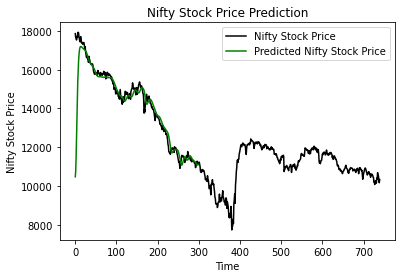

In [22]:
plt.plot(real_stock_price, color = 'black', label = 'Nifty Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Nifty Stock Price')
plt.title('Nifty Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Nifty Stock Price')
plt.legend()
plt.show()